### import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### read data in 'fake_reg.csv'

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### explore dataset

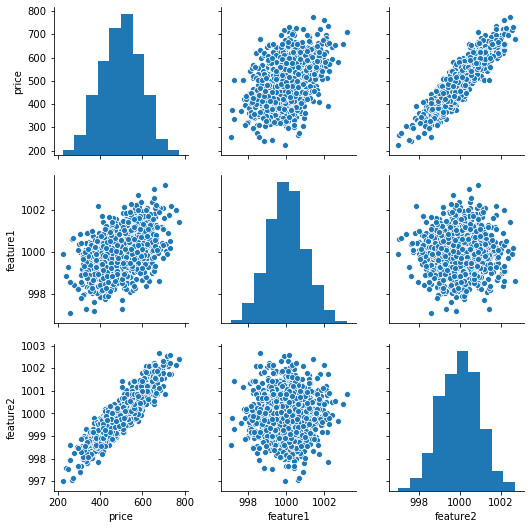

In [4]:
sns.pairplot(df)

### split data into train/test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### verify your split

In [9]:
X_train.shape

(700, 2)

In [10]:
y_test.shape

(300,)

### scale your data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

### verify scaling

In [16]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

##  ===TensorFlow===

### import

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### create a sequential model for the above regression data, with 3 layers+ output

In [21]:
model = Sequential()

#add layers
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))

#add output
model.add(Dense(1))

#compile
model.compile(opetimizer='rmsprop',loss='mse')

### train model with above regression data, 250 epochs

In [22]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256840.4262
Epoch 2/250
700/700 [==============================] - 0s 31us/sample - loss: 256761.5768
Epoch 3/250
700/700 [==============================] - 0s 30us/sample - loss: 256645.8868
Epoch 4/250
700/700 [==============================] - 0s 30us/sample - loss: 256536.7195
Epoch 5/250
700/700 [==============================] - 0s 30us/sample - loss: 256442.0068
Epoch 6/250
700/700 [==============================] - 0s 30us/sample - loss: 256352.0822
Epoch 7/250
700/700 [==============================] - 0s 29us/sample - loss: 256260.7271
Epoch 8/250
700/700 [==============================] - 0s 30us/sample - loss: 256168.1695
Epoch 9/250
700/700 [==============================] - 0s 30us/sample - loss: 256074.2673
Epoch 10/250
700/700 [==============================] - 0s 30us/sample - loss: 255977.3296
Epoch 11/250
700/700 [==============================] - 0s 30us/sample - loss: 

700/700 [==============================] - 0s 31us/sample - loss: 221552.7828
Epoch 91/250
700/700 [==============================] - 0s 29us/sample - loss: 220681.6059
Epoch 92/250
700/700 [==============================] - 0s 29us/sample - loss: 219792.1378
Epoch 93/250
700/700 [==============================] - 0s 30us/sample - loss: 218893.2835
Epoch 94/250
700/700 [==============================] - 0s 30us/sample - loss: 217984.5855
Epoch 95/250
700/700 [==============================] - 0s 29us/sample - loss: 217057.6094
Epoch 96/250
700/700 [==============================] - 0s 29us/sample - loss: 216117.7603
Epoch 97/250
700/700 [==============================] - 0s 30us/sample - loss: 215166.2436
Epoch 98/250
700/700 [==============================] - 0s 29us/sample - loss: 214205.0172
Epoch 99/250
700/700 [==============================] - 0s 30us/sample - loss: 213228.5031
Epoch 100/250
700/700 [==============================] - 0s 30us/sample - loss: 212235.2248
Epoch 101/2

700/700 [==============================] - 0s 30us/sample - loss: 98047.9572
Epoch 180/250
700/700 [==============================] - 0s 30us/sample - loss: 96308.5548
Epoch 181/250
700/700 [==============================] - 0s 30us/sample - loss: 94572.0787
Epoch 182/250
700/700 [==============================] - 0s 29us/sample - loss: 92828.1760
Epoch 183/250
700/700 [==============================] - 0s 30us/sample - loss: 91093.4033
Epoch 184/250
700/700 [==============================] - 0s 30us/sample - loss: 89360.5533
Epoch 185/250
700/700 [==============================] - 0s 29us/sample - loss: 87621.7190
Epoch 186/250
700/700 [==============================] - 0s 30us/sample - loss: 85883.3924
Epoch 187/250
700/700 [==============================] - 0s 31us/sample - loss: 84149.9787
Epoch 188/250
700/700 [==============================] - 0s 30us/sample - loss: 82421.6381
Epoch 189/250
700/700 [==============================] - 0s 31us/sample - loss: 80695.9925
Epoch 190/250

### plot training history for loss

In [25]:
df_loss = pd.DataFrame(model.history.history)

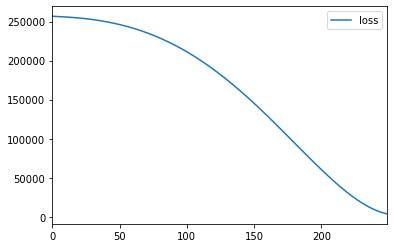

In [26]:
df_loss.plot()